### Problem:
FYou are an analyst in the RST soft drink company and you are expected to forecast the sales of the production of the soft drink for the upcoming 12 months from where the data ends. The data for the production of soft drink has been given to you from January 1980 to July 1995.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df1 = pd.read_csv('SoftDrink.csv')
df1.head()

,YearMonth,SoftDrinkProduction
0,1980-01,1954
1,1980-02,2302
2,1980-03,3054
3,1980-04,2414
4,1980-05,2226


In [6]:
df1.tail()

,YearMonth,SoftDrinkProduction
182,1995-03,4067
183,1995-04,4022
184,1995-05,3937
185,1995-06,4365
186,1995-07,4290


In [7]:
date = pd.date_range(start='1/1/1980', end='7/1/1995', freq='M')

In [8]:
df_1 = pd.read_csv("SoftDrink.csv")

In [9]:
df_1['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_1.head()

,YearMonth,SoftDrinkProduction,Time_Stamp
0,1980-01,1954,1980-01-31
1,1980-02,2302,1980-02-29
2,1980-03,3054,1980-03-31
3,1980-04,2414,1980-04-30
4,1980-05,2226,1980-05-31


In [10]:
df_1.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df_1.head()

,YearMonth,SoftDrinkProduction
Time_Stamp,,
1980-01-31,1980-01,1954
1980-02-29,1980-02,2302
1980-03-31,1980-03,3054
1980-04-30,1980-04,2414
1980-05-31,1980-05,2226


In [11]:
df_1.drop(labels='YearMonth',inplace=True,axis=1)
df_1.head()

,SoftDrinkProduction
Time_Stamp,
1980-01-31,1954
1980-02-29,2302
1980-03-31,3054
1980-04-30,2414
1980-05-31,2226


In [18]:
df_1['SoftDrinkProduction']

Time_Stamp
1980-01-31    1954
1980-02-29    2302
1980-03-31    3054
1980-04-30    2414
1980-05-31    2226
              ... 
1995-03-31    4067
1995-04-30    4022
1995-05-31    3937
1995-06-30    4365
NaT           4290
Name: SoftDrinkProduction, Length: 187, dtype: int64

### Split the data into train and test and plot the training and test data.
Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [19]:
trainsoft=df_1[df_1.index.year < 1991]
testsoft=df_1[df_1.index.year >= 1991]

In [112]:
print('First few rows of Training Data','\n',trainsoft.head(),'\n')
print('Last few rows of Training Data','\n',trainsoft.tail(),'\n')
print('First few rows of Test Data','\n',testsoft.head(),'\n')
print('Last few rows of Test Data','\n',testsoft.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-02-28       1402
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688 



In [20]:
print(trainsoft.shape)
print(testsoft.shape)

(132, 1)
(54, 1)


## Check for stationarity of the whole Time Series data.

In [21]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

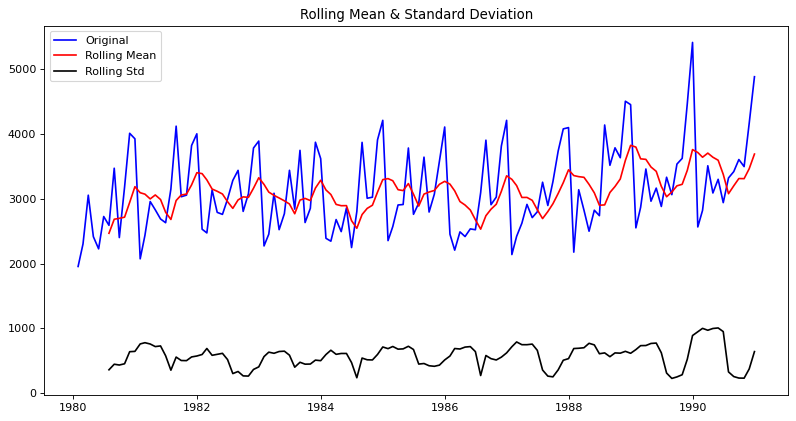

Results of Dickey-Fuller Test:
Test Statistic                  -0.990112
p-value                          0.756854
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [22]:
figure(figsize=(12, 6), dpi=80)
test_stationarity(trainsoft)

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

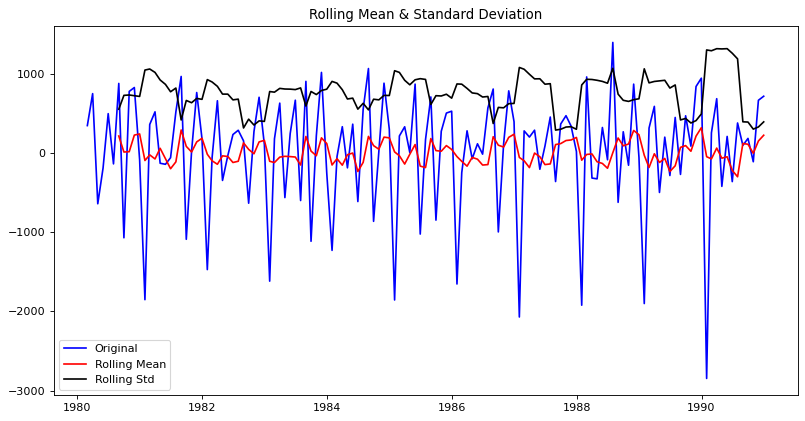

Results of Dickey-Fuller Test:
Test Statistic                -7.299886e+00
p-value                        1.347278e-10
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [23]:
figure(figsize=(12, 6), dpi=80)
test_stationarity(trainsoft.diff().dropna())

We see that at  𝛼  = 0.05 the Time Series is indeed stationary.

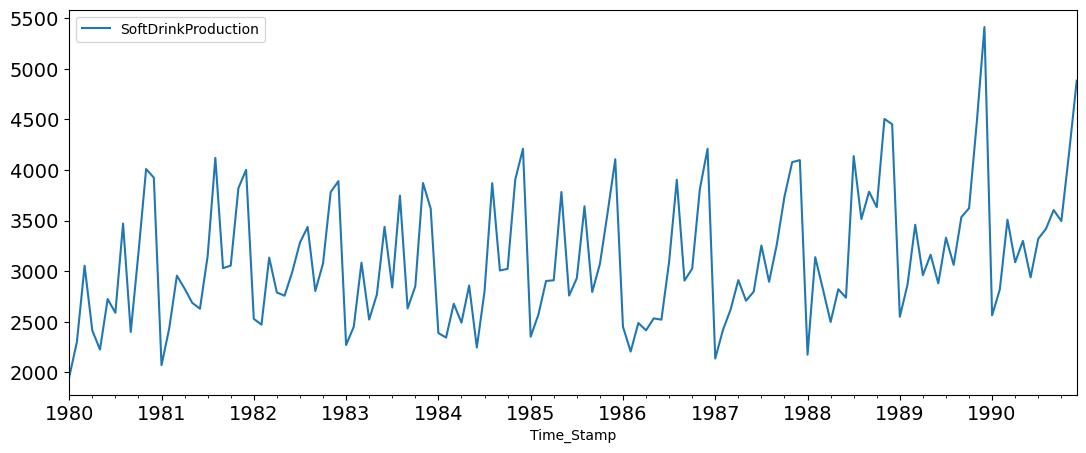

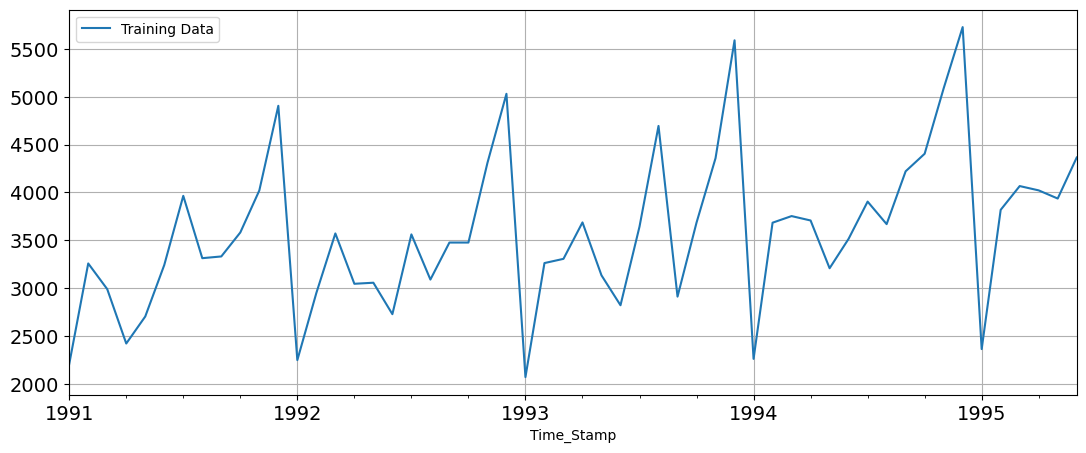

In [24]:
trainsoft.plot(figsize=(13,5), fontsize=14)
testsoft.plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### Linear Regression Model

In [25]:
train_time = [i+1 for i in range(len(trainsoft))]
test_time = [i+133 for i in range(len(testsoft))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


In [26]:
LinearRegression_train = trainsoft.copy()
LinearRegression_test = testsoft.copy()

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             SoftDrinkProduction  time
Time_Stamp                           
1980-01-31                 1954     1
1980-02-29                 2302     2
1980-03-31                 3054     3
1980-04-30                 2414     4
1980-05-31                 2226     5 

Last few rows of Training Data 
             SoftDrinkProduction  time
Time_Stamp                           
1990-08-31                 3418   128
1990-09-30                 3604   129
1990-10-31                 3495   130
1990-11-30                 4163   131
1990-12-31                 4882   132 

First few rows of Test Data 
             SoftDrinkProduction  time
Time_Stamp                           
1991-01-31                 2211   133
1991-02-28                 3260   134
1991-03-31                 2992   135
1991-04-30                 2425   136
1991-05-31                 2707   137 

Last few rows of Test Data 
             SoftDrinkProduction  time
Time_Stamp                      

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [34]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['SoftDrinkProduction'])

LinearRegression()

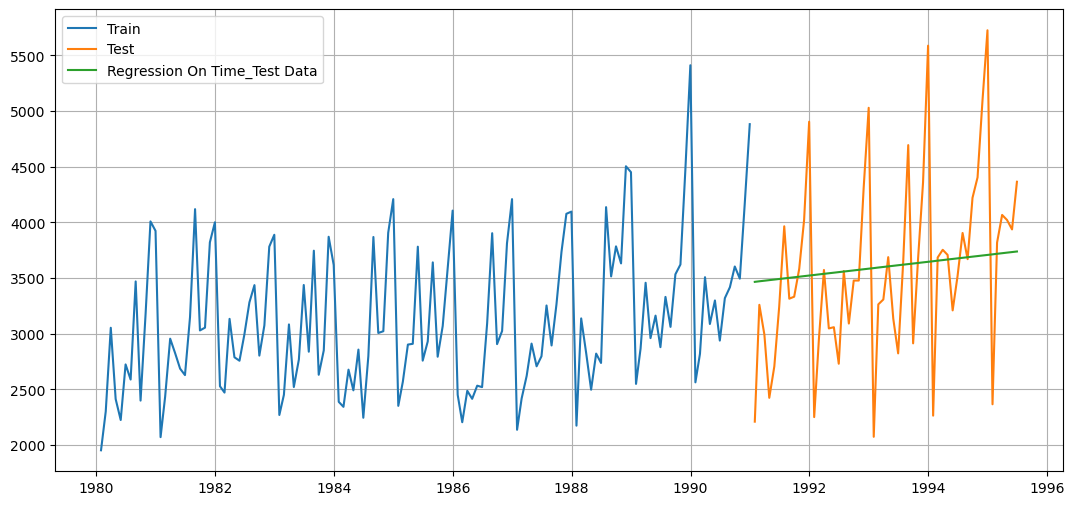

In [35]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( trainsoft['SoftDrinkProduction'], label='Train')
plt.plot(testsoft['SoftDrinkProduction'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [36]:
from sklearn import metrics

In [37]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(testsoft['SoftDrinkProduction'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 779.424


In [38]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,779.424337


## Model 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡 

In [39]:
NaiveModel_train = trainsoft.copy()
NaiveModel_test = testsoft.copy()

In [47]:
trainsoft['SoftDrinkProduction'][len(np.asarray(trainsoft['SoftDrinkProduction']))-1]

4882

In [49]:
NaiveModel_test['naive'] = np.asarray(trainsoft['SoftDrinkProduction'])[len(np.asarray(trainsoft['SoftDrinkProduction']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    4882
1991-02-28    4882
1991-03-31    4882
1991-04-30    4882
1991-05-31    4882
Name: naive, dtype: int64

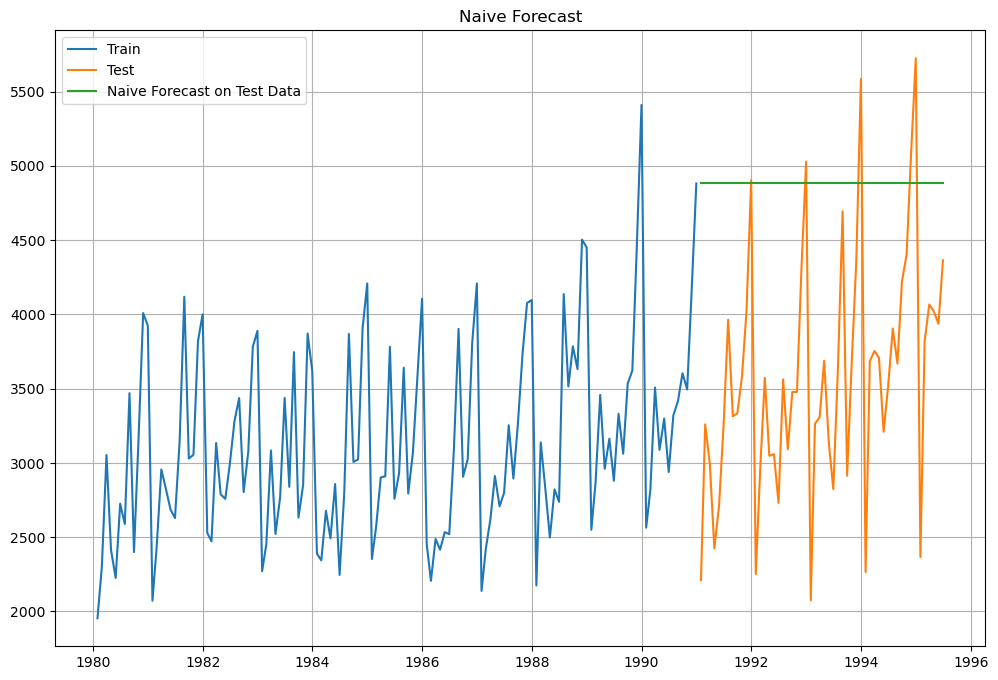

In [51]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['SoftDrinkProduction'], label='Train')
plt.plot(testsoft['SoftDrinkProduction'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation Naive Bayes

In [52]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(testsoft['SoftDrinkProduction'],NaiveModel_test['naive'],squared=False)
print("For Naive Bayes forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive Bayes forecast on the Test Data,  RMSE is 1531.144


In [53]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,779.424337
NaiveModel,1531.144029


## Method 3: Simple Average

In [54]:
SimpleAverage_train = trainsoft.copy()
SimpleAverage_test = testsoft.copy()

In [55]:
SimpleAverage_test['mean_forecast'] = trainsoft['SoftDrinkProduction'].mean()
SimpleAverage_test.head()

,SoftDrinkProduction,mean_forecast
Time_Stamp,,
1991-01-31,2211,3124.166667
1991-02-28,3260,3124.166667
1991-03-31,2992,3124.166667
1991-04-30,2425,3124.166667
1991-05-31,2707,3124.166667


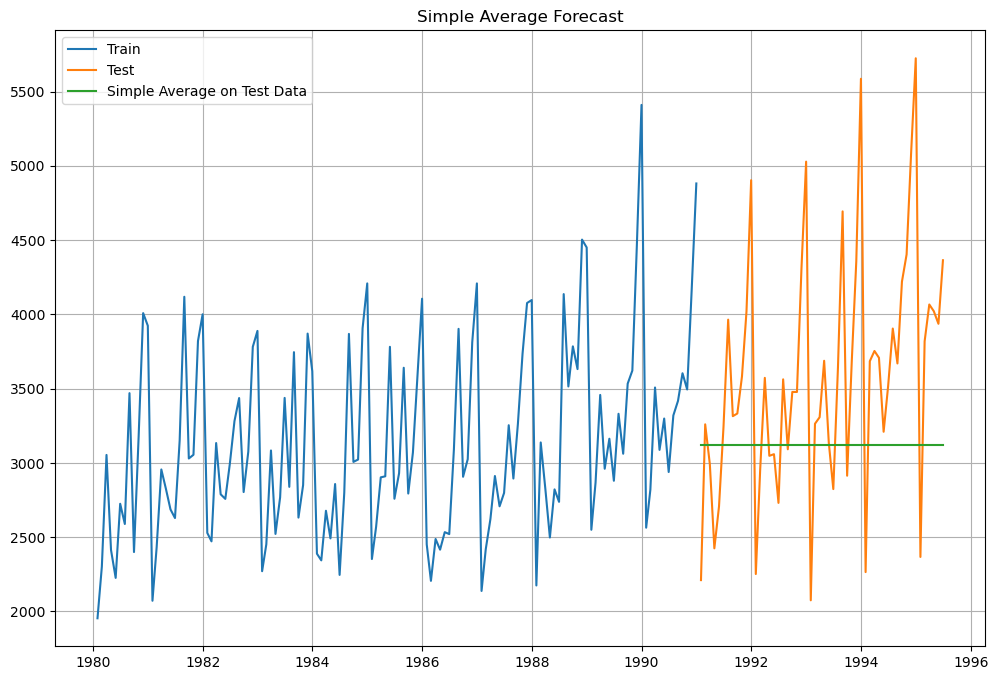

In [56]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(SimpleAverage_test['SoftDrinkProduction'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation Simple Average

In [57]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(testsoft['SoftDrinkProduction'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 929.523


In [58]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,779.424337
NaiveModel,1531.144029
Simple Average Model,929.523210


## Method 4: Moving Average(MA)

In [59]:
MovingAverage = df_1.copy()
MovingAverage.head()

,SoftDrinkProduction
Time_Stamp,
1980-01-31,1954
1980-02-29,2302
1980-03-31,3054
1980-04-30,2414
1980-05-31,2226


In [60]:

MovingAverage['Trailing_2'] = MovingAverage['SoftDrinkProduction'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['SoftDrinkProduction'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['SoftDrinkProduction'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['SoftDrinkProduction'].rolling(9).mean()

MovingAverage.head(10)

,SoftDrinkProduction,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1954,NaN,NaN,NaN,NaN
1980-02-29,2302,2128.0,NaN,NaN,NaN
1980-03-31,3054,2678.0,NaN,NaN,NaN
1980-04-30,2414,2734.0,2431.00,NaN,NaN
1980-05-31,2226,2320.0,2499.00,NaN,NaN
1980-06-30,2725,2475.5,2604.75,2445.833333,NaN
1980-07-31,2589,2657.0,2488.50,2551.666667,NaN
1980-08-31,3470,3029.5,2752.50,2746.333333,NaN
1980-09-30,2400,2935.0,2796.00,2637.333333,2570.444444


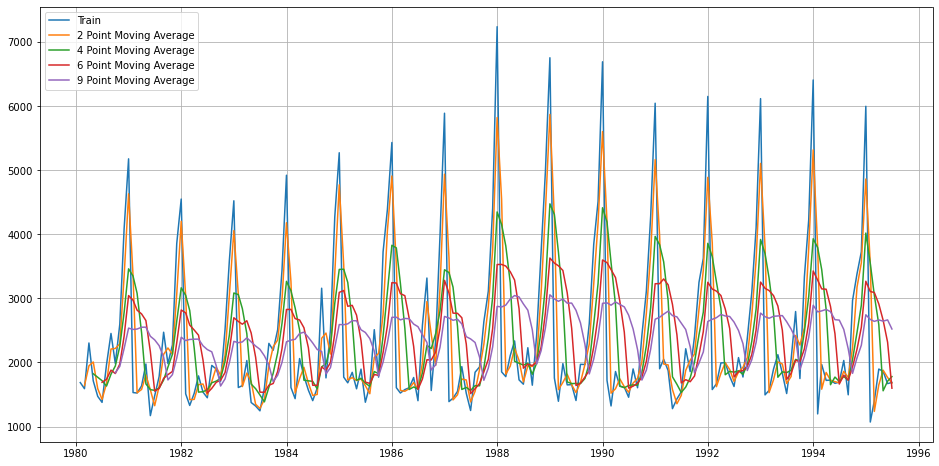

In [144]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['SoftDrinkProduction''], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [61]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[df_1.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[df_1.index.year >= 1991]

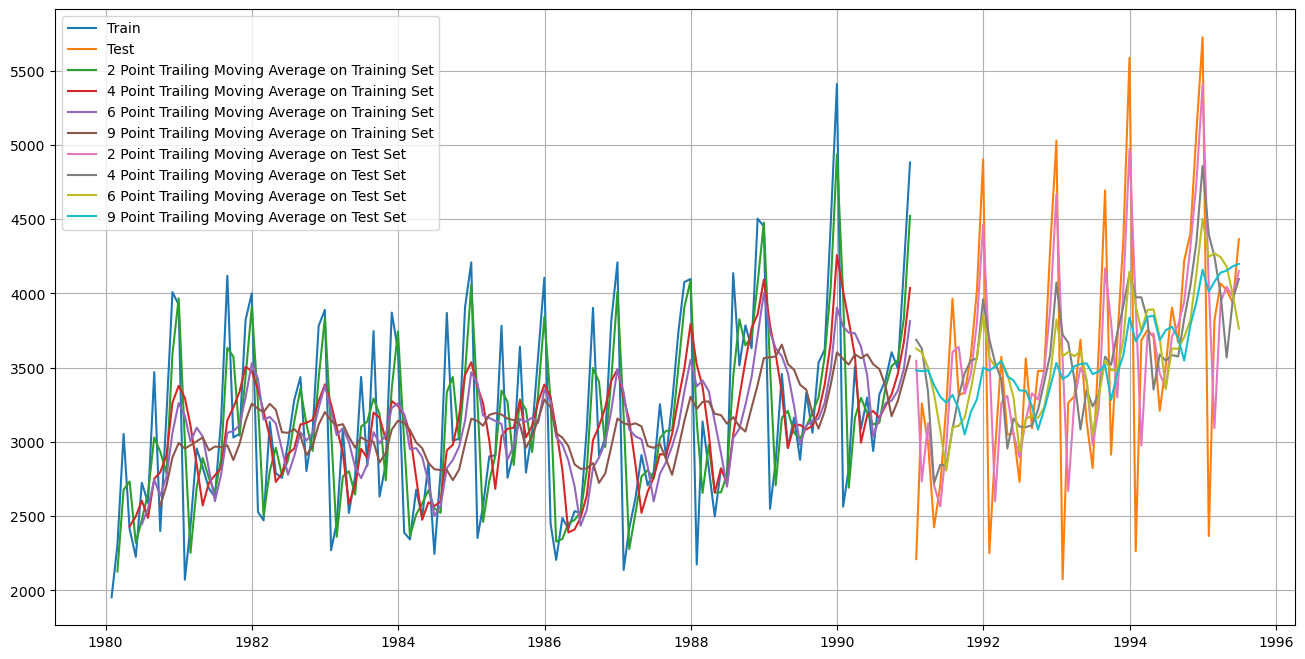

In [62]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(trailing_MovingAverage_test['SoftDrinkProduction'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation - Done on the Test Data

In [63]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(testsoft['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(testsoft['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(testsoft['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(testsoft['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 561.833
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 693.267
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 716.511
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 742.539 


In [64]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2 point Trailing Moving Average','4 point Trailing Moving Average'
                                   ,'6 point Trailing Moving Average','9 point Trailing Moving Average'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,779.424337
NaiveModel,1531.144029
Simple Average Model,929.523210
2 point Trailing Moving Average,561.833461
4 point Trailing Moving Average,693.266525
6 point Trailing Moving Average,716.510800
9 point Trailing Moving Average,742.538655


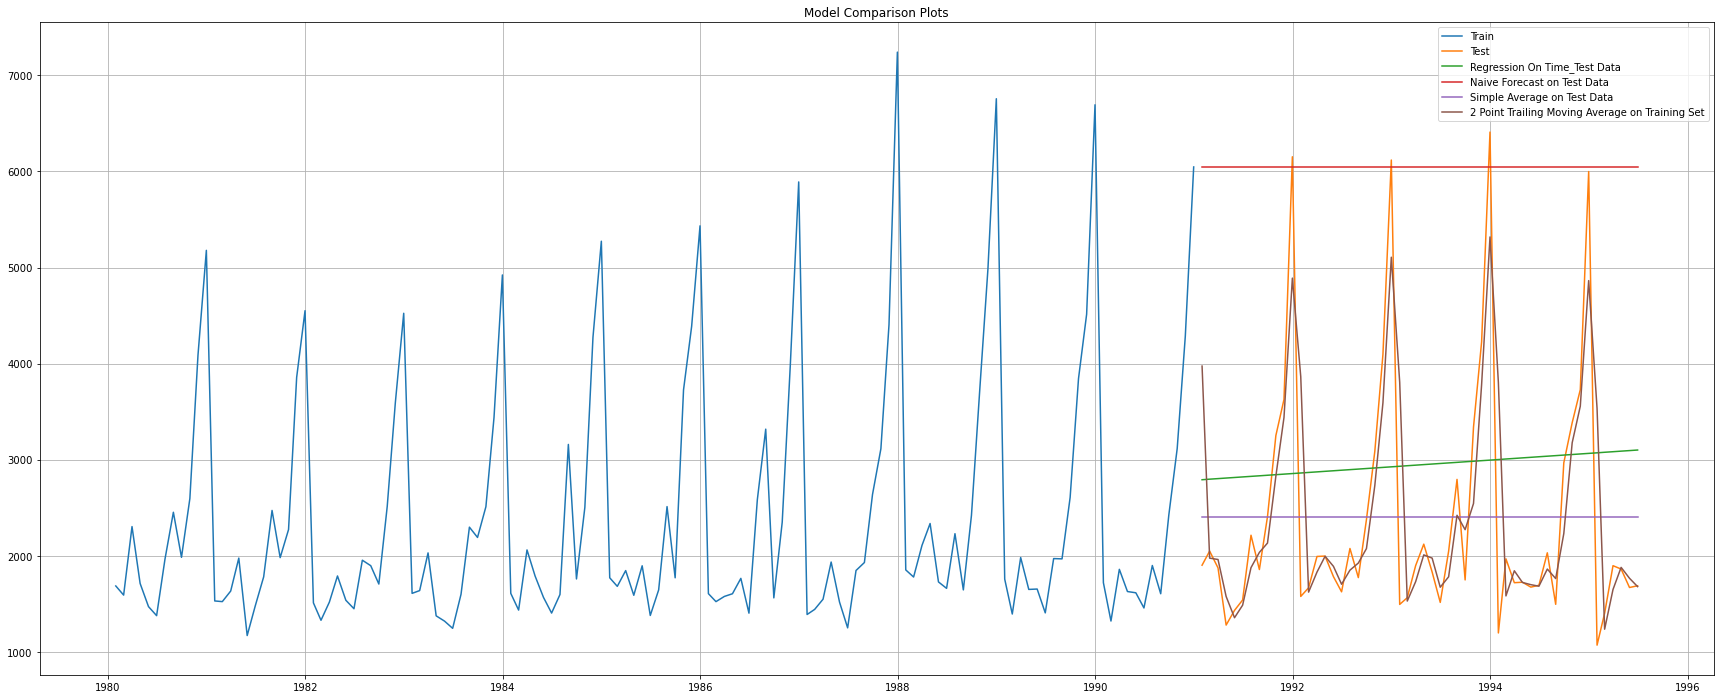

In [149]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(trainsoft['SoftDrinkProduction''], label='Train')
plt.plot(testsoft['SoftDrinkProduction''], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [65]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [66]:
SES_train = trainsoft.copy()
SES_test = testsoft.copy()

In [67]:
model_SES = SimpleExpSmoothing(SES_train["SoftDrinkProduction"])

C:\Users\Deepak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [68]:
model_SES_autofit = model_SES.fit(optimized=True)

In [69]:
model_SES_autofit.params

{'smoothing_level': 0.15727011750416564,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1954.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [70]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(testsoft))
SES_test.head()

,SoftDrinkProduction,predict
Time_Stamp,,
1991-01-31,2211,3736.175067
1991-02-28,3260,3736.175067
1991-03-31,2992,3736.175067
1991-04-30,2425,3736.175067
1991-05-31,2707,3736.175067


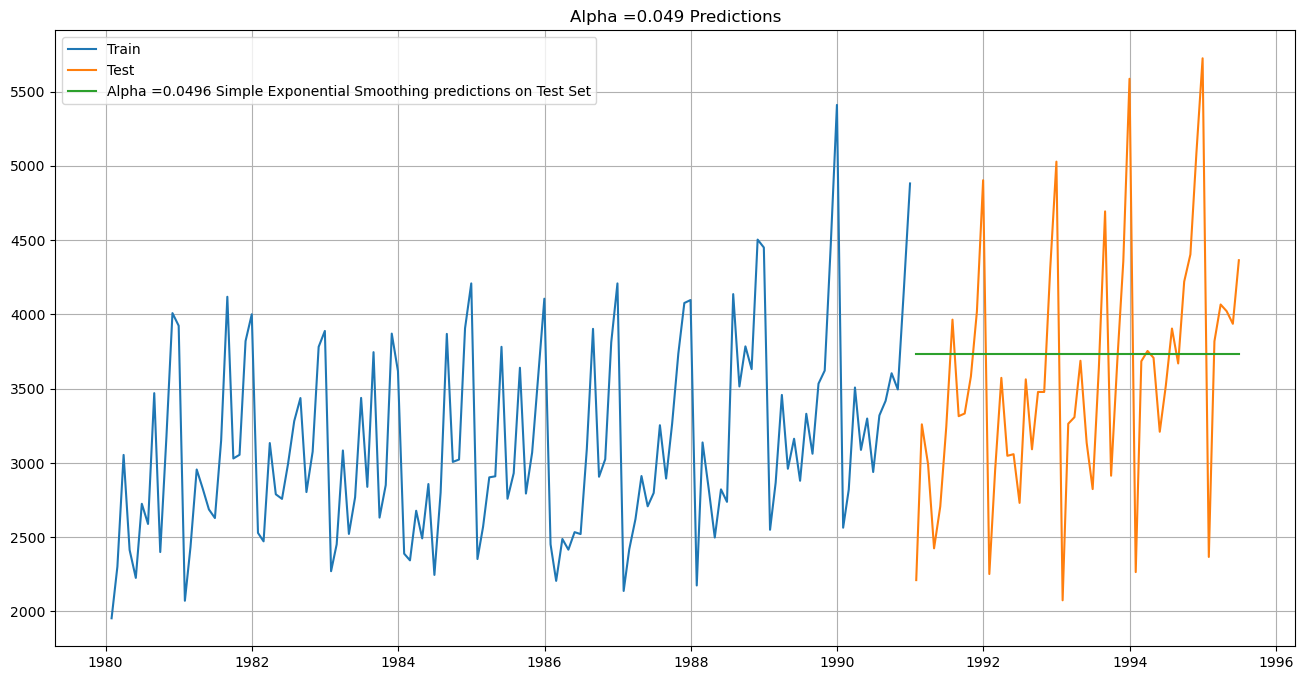

In [71]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['SoftDrinkProduction'], label='Train')
plt.plot(SES_test['SoftDrinkProduction'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.049 Predictions');

### Model Evaluation for  𝛼  = 0.049 : Simple Exponential Smoothing

In [72]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['SoftDrinkProduction'],SES_test['predict'],squared=False)
print("For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 823.512


In [73]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.098,Simple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,779.424337
NaiveModel,1531.144029
Simple Average Model,929.523210
2 point Trailing Moving Average,561.833461
4 point Trailing Moving Average,693.266525
6 point Trailing Moving Average,716.510800
9 point Trailing Moving Average,742.538655
"Alpha=0.098,Simple Exponential Smoothing",823.511984


### Testing the SoftDrink Dataset with different Alpha Values

In [74]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [75]:
for i in np.arange(0.0,0.09,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(testsoft))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['SoftDrinkProduction'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['SoftDrinkProduction'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [76]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
8,0.08,654.998515,809.190056
7,0.07,660.192316,810.475534
6,0.06,667.675509,813.341054
5,0.05,678.794247,818.736057
4,0.04,696.250078,828.710020
3,0.03,726.303562,848.882842
2,0.02,785.970221,899.916023
1,0.01,928.739914,1077.084286
0,0.00,1334.246888,1817.907049


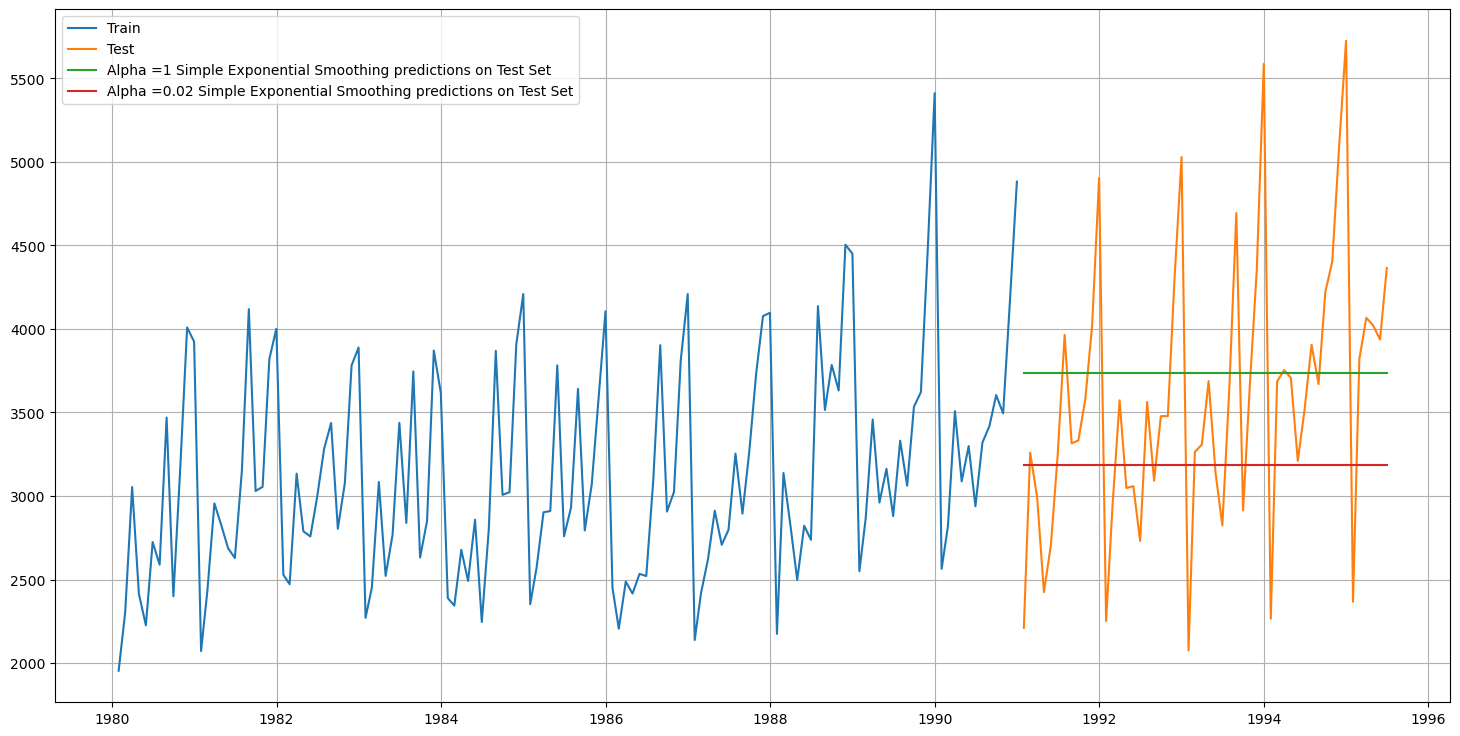

In [77]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['SoftDrinkProduction'], label='Train')
plt.plot(SES_test['SoftDrinkProduction'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.02], label='Alpha =0.02 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [78]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.02,Simple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,779.424337
NaiveModel,1531.144029
Simple Average Model,929.523210
2 point Trailing Moving Average,561.833461
4 point Trailing Moving Average,693.266525
6 point Trailing Moving Average,716.510800
9 point Trailing Moving Average,742.538655
"Alpha=0.098,Simple Exponential Smoothing",823.511984
"Alpha=0.02,Simple Exponential Smoothing",809.190056


In [79]:
resultsDf

,Test RMSE
RegressionOnTime,779.424337
NaiveModel,1531.144029
Simple Average Model,929.523210
2 point Trailing Moving Average,561.833461
4 point Trailing Moving Average,693.266525
6 point Trailing Moving Average,716.510800
9 point Trailing Moving Average,742.538655
"Alpha=0.098,Simple Exponential Smoothing",823.511984
"Alpha=0.02,Simple Exponential Smoothing",809.190056


## Method 6: Double Exponential Smoothing (Holt's Model)

In [80]:
DES_train = trainsoft.copy()
DES_test = testsoft.copy()

In [81]:
model_DES = Holt(DES_train['SoftDrinkProduction'])

C:\Users\Deepak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [82]:
model_DES_autofit = model_DES.fit(optimized=True)

In [83]:
model_DES_autofit.params

{'smoothing_level': 0.42386847035690906,
 'smoothing_trend': 0.08380547577560998,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1954.0,
 'initial_trend': 348.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [84]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(testsoft))
DES_test.head()

,SoftDrinkProduction,predict
Time_Stamp,,
1991-01-31,2211,4320.487084
1991-02-28,3260,4390.406349
1991-03-31,2992,4460.325614
1991-04-30,2425,4530.244880
1991-05-31,2707,4600.164145


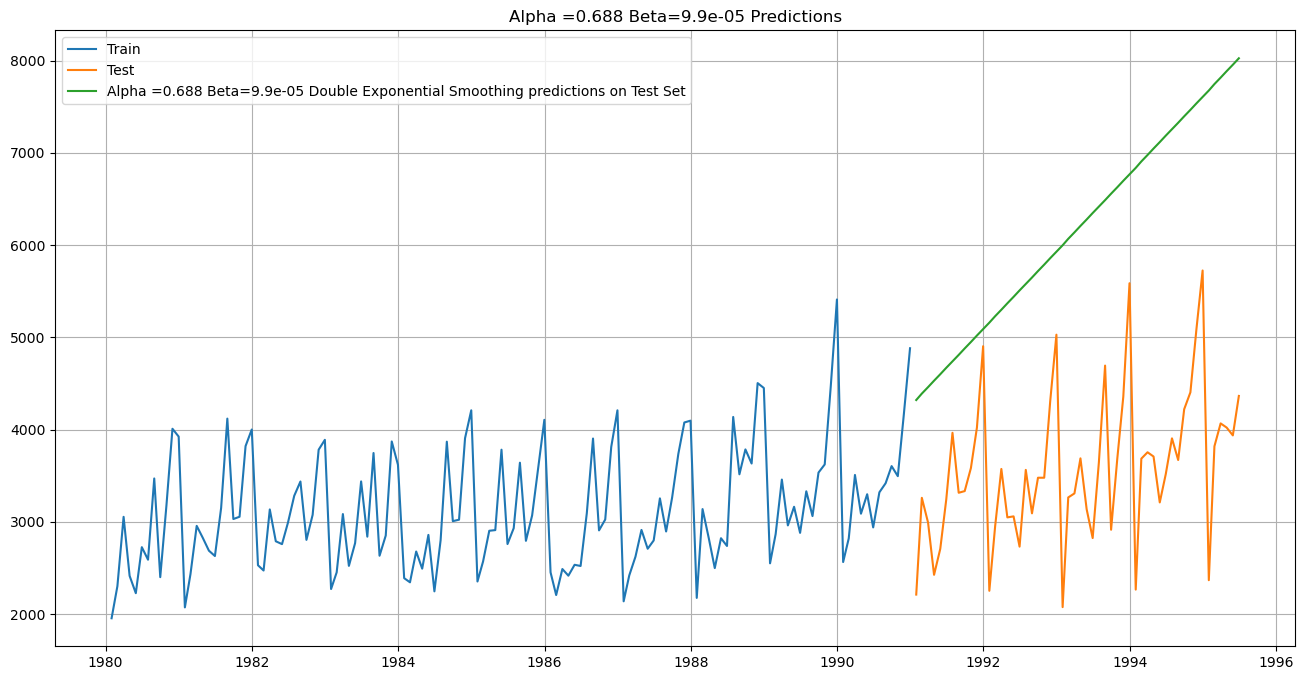

In [85]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['SoftDrinkProduction'], label='Train')
plt.plot(DES_test['SoftDrinkProduction'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.688 Beta=9.9e-05 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.688 Beta=9.9e-05 Predictions');

In [86]:
rmse_model5_test_1 = metrics.mean_squared_error(DES_test['SoftDrinkProduction'],DES_test['predict'],squared=False)
print("For Alpha =0.688 Beta=9.9e-05 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.688 Beta=9.9e-05 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 2797.573


In [87]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]}
                           ,index=['Alpha =0.688 Beta=9.9e-05 Double Exponential Smoothing Model'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,779.424337
NaiveModel,1531.144029
Simple Average Model,929.523210
2 point Trailing Moving Average,561.833461
4 point Trailing Moving Average,693.266525
6 point Trailing Moving Average,716.510800
9 point Trailing Moving Average,742.538655
"Alpha=0.098,Simple Exponential Smoothing",823.511984
"Alpha=0.02,Simple Exponential Smoothing",809.190056
Alpha =0.688 Beta=9.9e-05 Double Exponential Smoothing Model,2797.572981


In [88]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [89]:
for i in np.arange(0.01,1.1,0.01):
    for j in np.arange(0.01,1.1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(testsoft))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['SoftDrinkProduction'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['SoftDrinkProduction'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [90]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.01,0.01,14331.236144,23315.549690
1,0.01,0.02,12375.992894,14393.264000
2,0.01,0.03,10738.242321,7548.615433
3,0.01,0.04,9389.116830,3058.603710
4,0.01,0.05,8299.428504,3394.345367
...,...,...,...,...
11876,1.09,1.05,1292.682064,20231.544473
11877,1.09,1.06,1301.069005,20081.128262
11878,1.09,1.07,1309.608400,19920.132647
11879,1.09,1.08,1318.306377,19748.185727


In [177]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
125,0.02,0.17,1488.674782,1285.097949
158,0.02,0.50,1414.589159,1285.175015
274,0.03,0.57,1438.850143,1286.930899
159,0.02,0.51,1414.674946,1288.045743
273,0.03,0.56,1436.265971,1288.750740


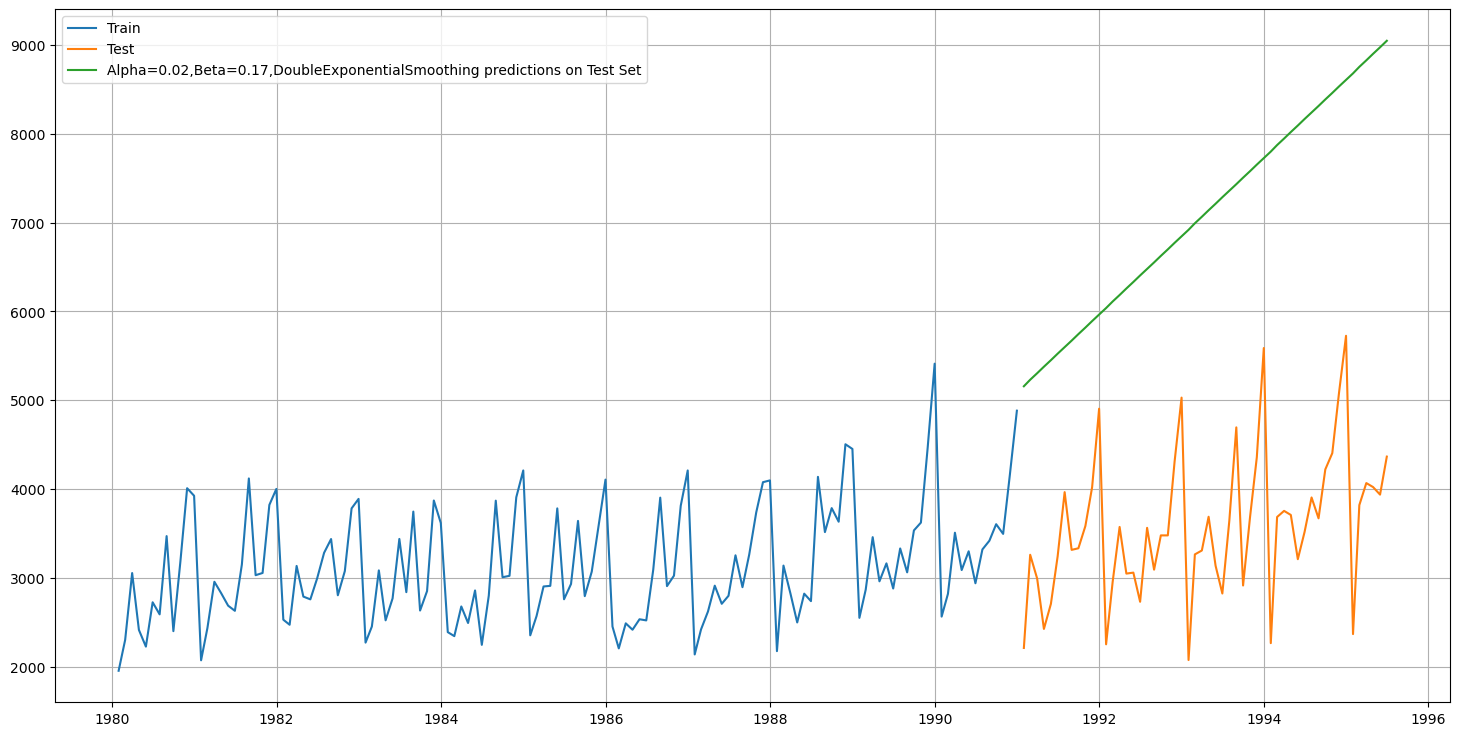

In [91]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['SoftDrinkProduction'], label='Train')
plt.plot(DES_test['SoftDrinkProduction'], label='Test')

plt.plot(DES_test['predict', 0.02, 0.17], label='Alpha=0.02,Beta=0.17,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [93]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.02,Beta=0.17,Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf 

,Test RMSE
RegressionOnTime,779.424337
NaiveModel,1531.144029
Simple Average Model,929.523210
2 point Trailing Moving Average,561.833461
4 point Trailing Moving Average,693.266525
6 point Trailing Moving Average,716.510800
9 point Trailing Moving Average,742.538655
"Alpha=0.098,Simple Exponential Smoothing",823.511984
"Alpha=0.02,Simple Exponential Smoothing",809.190056
Alpha =0.688 Beta=9.9e-05 Double Exponential Smoothing Model,2797.572981


## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [94]:
TES_train = trainsoft.copy()
TES_test = testsoft.copy()

In [95]:
model_TES = ExponentialSmoothing(TES_train['SoftDrinkProduction'],trend='additive',seasonal='multiplicative',freq='M')

In [96]:
model_TES_autofit = model_TES.fit()

In [97]:
model_TES_autofit.params

{'smoothing_level': 0.11109431519592447,
 'smoothing_trend': 0.049376826867578195,
 'smoothing_seasonal': 0.23045135049306534,
 'damping_trend': nan,
 'initial_level': 2803.2031192879085,
 'initial_trend': 15.090789924689997,
 'initial_seasons': array([0.81675206, 0.85707329, 1.03845496, 0.9260439 , 0.95069866,
        0.97315248, 1.03766339, 1.25338534, 0.99255867, 1.07376893,
        1.35052981, 1.38008798]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [98]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(testsoft))
TES_test.head()

,SoftDrinkProduction,auto_predict
Time_Stamp,,
1991-01-31,2211,2569.744680
1991-02-28,3260,2890.183186
1991-03-31,2992,3297.975314
1991-04-30,2425,3008.698928
1991-05-31,2707,3215.504574


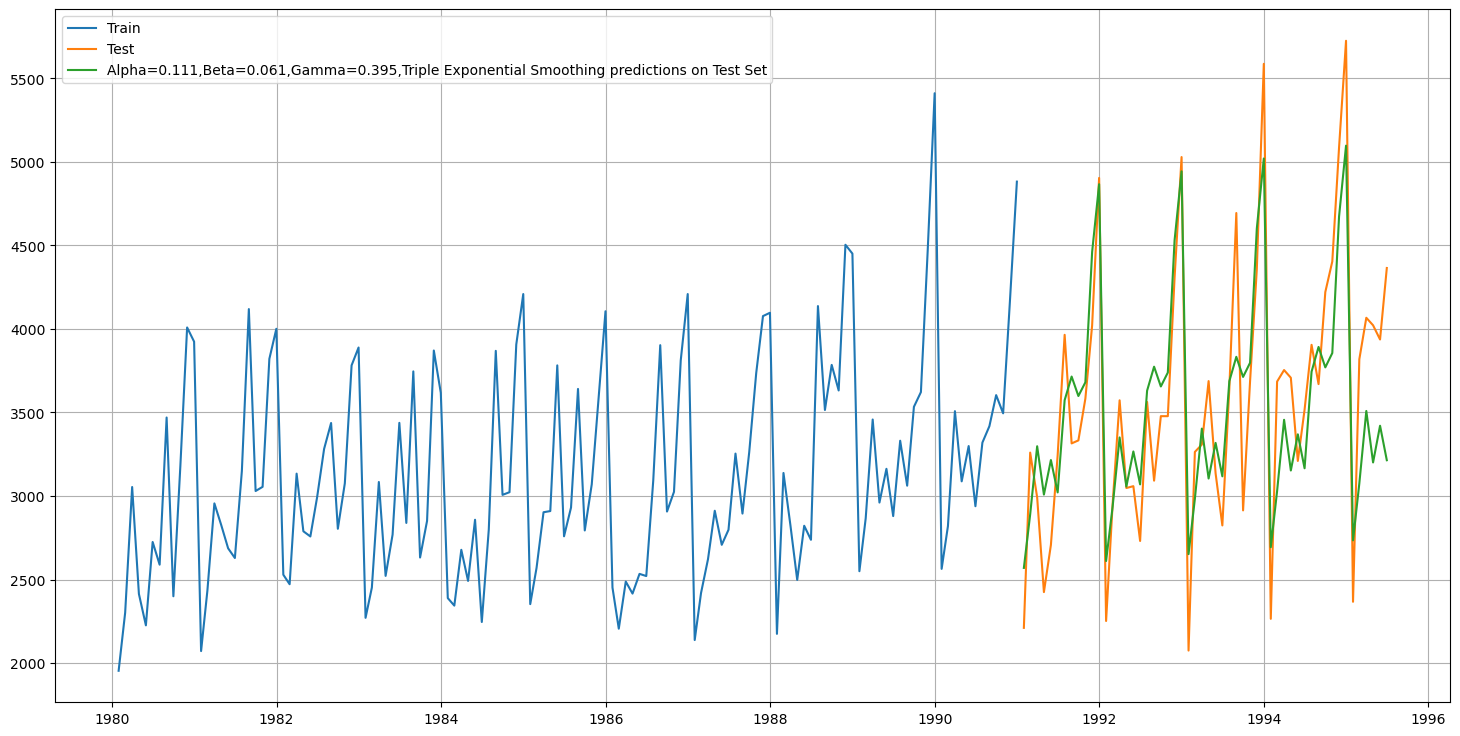

In [99]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['SoftDrinkProduction'], label='Train')
plt.plot(TES_test['SoftDrinkProduction'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.061,Gamma=0.395,Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [100]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['SoftDrinkProduction'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 446.826


In [101]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=[' Alpha=0.111, Beta=0.061, Gamma=0.395,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,779.424337
NaiveModel,1531.144029
Simple Average Model,929.523210
2 point Trailing Moving Average,561.833461
4 point Trailing Moving Average,693.266525
6 point Trailing Moving Average,716.510800
9 point Trailing Moving Average,742.538655
"Alpha=0.098,Simple Exponential Smoothing",823.511984
"Alpha=0.02,Simple Exponential Smoothing",809.190056
Alpha =0.688 Beta=9.9e-05 Double Exponential Smoothing Model,2797.572981


In [102]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [103]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.01,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(testsoft))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['SoftDrinkProduction'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['SoftDrinkProduction'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [104]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.01,0.1,3.377284e+02,4.650591e+02
1,0.1,0.01,0.2,3.304648e+02,4.341952e+02
2,0.1,0.01,0.3,3.287550e+02,4.226801e+02
3,0.1,0.01,0.4,3.308037e+02,4.195360e+02
4,0.1,0.01,0.5,3.356309e+02,4.214460e+02
...,...,...,...,...,...
805,0.9,0.91,0.5,1.683282e+04,1.862625e+05
806,0.9,0.91,0.6,4.122607e+04,1.282501e+07
807,0.9,0.91,0.7,1.178874e+07,5.540358e+04
808,0.9,0.91,0.8,1.030868e+05,1.077423e+05


In [191]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
541,0.7,0.01,0.2,411.064883,330.180489
631,0.8,0.01,0.2,425.909157,333.454756
451,0.6,0.01,0.2,398.626867,333.780512
721,0.9,0.01,0.2,442.967932,339.158331
632,0.8,0.01,0.3,434.051048,344.570012


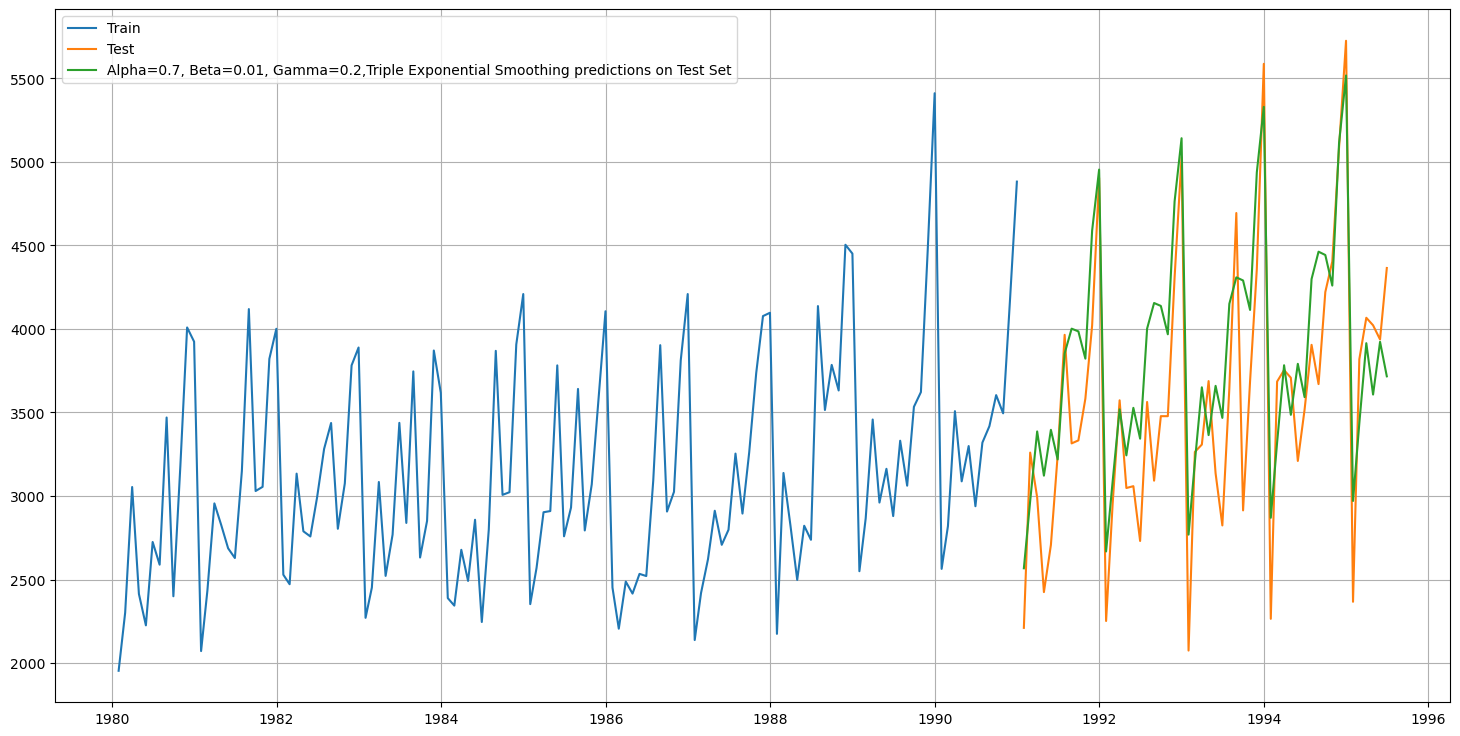

In [105]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['SoftDrinkProduction'], label='Train')
plt.plot(TES_test['SoftDrinkProduction'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict',  0.7000000000000001, 0.01, 0.2], label='Alpha=0.7, Beta=0.01, Gamma=0.2,Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [106]:
TES_test.T.to_csv('predict.csv')

In [107]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.7, Beta=0.01, Gamma=0.2,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf



,Test RMSE
RegressionOnTime,779.424337
NaiveModel,1531.144029
Simple Average Model,929.523210
2 point Trailing Moving Average,561.833461
4 point Trailing Moving Average,693.266525
6 point Trailing Moving Average,716.510800
9 point Trailing Moving Average,742.538655
"Alpha=0.098,Simple Exponential Smoothing",823.511984
"Alpha=0.02,Simple Exponential Smoothing",809.190056
Alpha =0.688 Beta=9.9e-05 Double Exponential Smoothing Model,2797.572981


##### Sorted by RMSE values on the Test Data


In [108]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.7, Beta=0.01, Gamma=0.2,Triple Exponential Smoothing",407.866388
"Alpha=0.111, Beta=0.061, Gamma=0.395,Triple Exponential Smoothing",446.825827
2 point Trailing Moving Average,561.833461
4 point Trailing Moving Average,693.266525
6 point Trailing Moving Average,716.510800
"Alpha=0.02,Beta=0.17,Double Exponential Smoothing",738.705950
"Alpha=0.02,Beta=0.17,Double Exponential Smoothing",738.705950
9 point Trailing Moving Average,742.538655
RegressionOnTime,779.424337
"Alpha=0.02,Simple Exponential Smoothing",809.190056


### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼  = 0.1,  𝛽  = 0.1 and  𝛾  = 0.2.

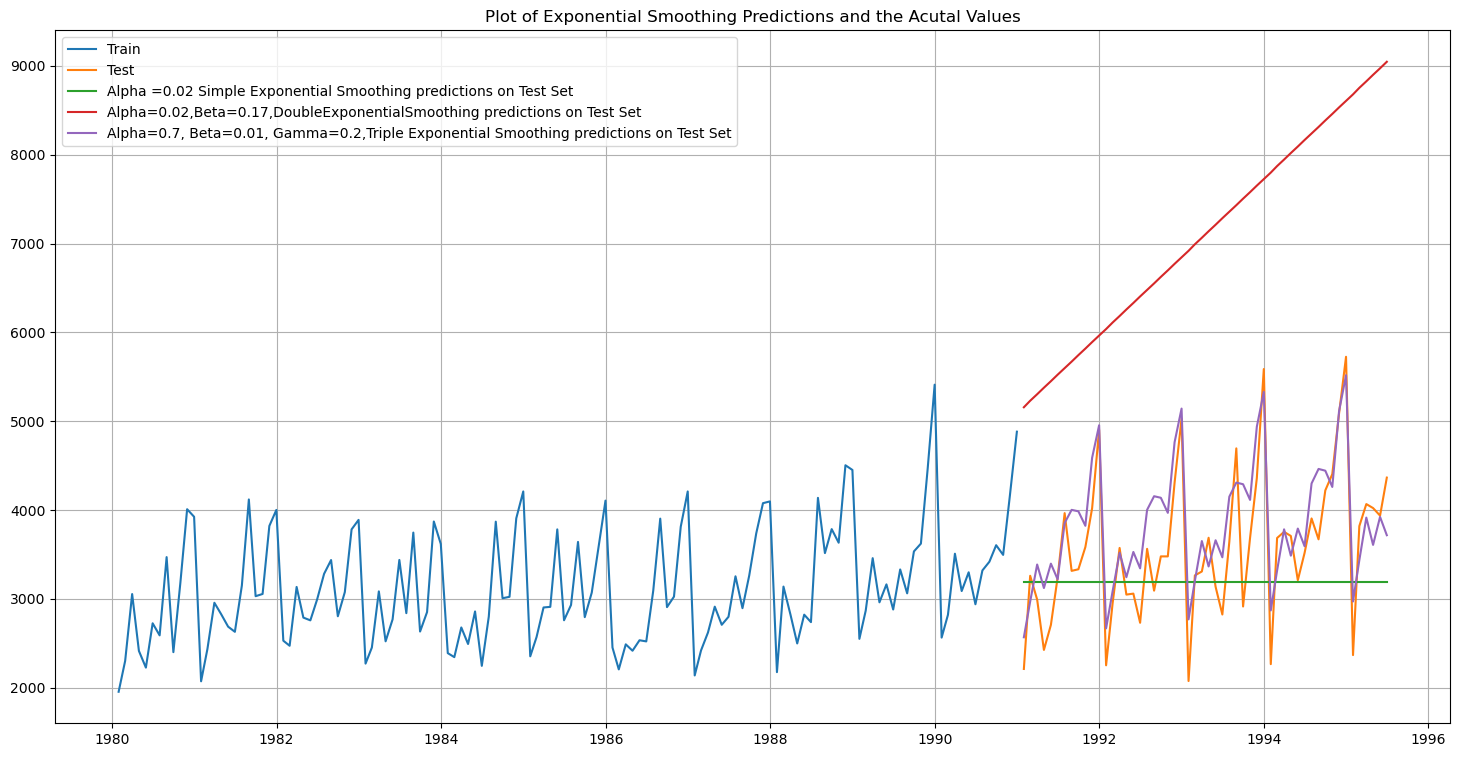

In [109]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(trainsoft['SoftDrinkProduction'], label='Train')
plt.plot(testsoft['SoftDrinkProduction'], label='Test')

plt.plot(SES_test['predict', 0.02], label='Alpha =0.02 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.02, 0.17], label='Alpha=0.02,Beta=0.17,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict',  0.7000000000000001, 0.01, 0.2], label='Alpha=0.7, Beta=0.01, Gamma=0.2,Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [110]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [111]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [121]:
from statsmodels.tsa.arima.model import ARIMA

In [122]:
for param in pdq:
    ARIMA_model = ARIMA(trainsoft['SoftDrinkProduction'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2103.7338336875
ARIMA(0, 1, 1) - AIC:2069.599630211537
ARIMA(0, 1, 2) - AIC:2056.489263243478
ARIMA(1, 1, 0) - AIC:2097.8721216490417
ARIMA(1, 1, 1) - AIC:2061.523083933688
ARIMA(1, 1, 2) - AIC:2056.715682068914
ARIMA(2, 1, 0) - AIC:2073.234860536023
ARIMA(2, 1, 1) - AIC:2059.1006718145854
ARIMA(2, 1, 2) - AIC:2058.7127020998623


In [123]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",2056.489263
5,"(1, 1, 2)",2056.715682
8,"(2, 1, 2)",2058.712702
7,"(2, 1, 1)",2059.100672
4,"(1, 1, 1)",2061.523084
1,"(0, 1, 1)",2069.599630
6,"(2, 1, 0)",2073.234861
3,"(1, 1, 0)",2097.872122
0,"(0, 1, 0)",2103.733834


In [124]:
mod = ARIMA(trainsoft['SoftDrinkProduction'], order=(2,1,2),freq='M')

results_Arima = mod.fit()

print(results_Arima.summary())

                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(2, 1, 2)   Log Likelihood               -1024.356
Date:                 Thu, 26 Oct 2023   AIC                           2058.713
Time:                         23:31:17   BIC                           2073.089
Sample:                     01-31-1980   HQIC                          2064.554
                          - 12-31-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2838      0.304     -0.933      0.351      -0.880       0.312
ar.L2         -0.0078      0.179     -0.044      0.965      -0.359       0.343
ma.L1         -0.3008      0.263     -1.145 

C:\Users\Deepak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


#### Predict on the Test Set using this model and evaluate the model.

In [125]:
predicted = results_Arima.forecast(steps=len(testsoft))

In [127]:
from sklearn.metrics import  mean_squared_error
rmse_arima_012 = mean_squared_error(testsoft,predicted,squared=False)
print(rmse_arima_012)

823.562325814588


In [128]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_arima_012]}
                           ,index=['ARIMA (0,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,779.424337
NaiveModel,1531.144029
Simple Average Model,929.523210
2 point Trailing Moving Average,561.833461
4 point Trailing Moving Average,693.266525
6 point Trailing Moving Average,716.510800
9 point Trailing Moving Average,742.538655
"Alpha=0.098,Simple Exponential Smoothing",823.511984
"Alpha=0.02,Simple Exponential Smoothing",809.190056
Alpha =0.688 Beta=9.9e-05 Double Exponential Smoothing Model,2797.572981


### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [129]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [130]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [131]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(trainsoft['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6)7 - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 6)7 - AIC:1991.6865911398427
SARIMA(0, 1, 0)x(0, 0, 2, 6)7 - AIC:1835.7619130467951
SARIMA(0, 1, 0)x(1, 0, 0, 6)7 - AIC:2001.2435317896568
SARIMA(0, 1, 0)x(1, 0, 1, 6)7 - AIC:1938.0559370895267
SARIMA(0, 1, 0)x(1, 0, 2, 6)7 - AIC:1819.7378453343667
SARIMA(0, 1, 0)x(2, 0, 0, 6)7 - AIC:1790.660005159761
SARIMA(0, 1, 0)x(2, 0, 1, 6)7 - AIC:1790.4200189619846
SARIMA(0, 1, 0)x(2, 0, 2, 6)7 - AIC:1765.5917652493813
SARIMA(0, 1, 1)x(0, 0, 0, 6)7 - AIC:2035.487178390737
SARIMA(0, 1, 1)x(0, 0, 1, 6)7 - AIC:1932.6082414352395
SARIMA(0, 1, 1)x(0, 0, 2, 6)7 - AIC:1785.2288259151237
SARIMA(0, 1, 1)x(1, 0, 0, 6)7 - AIC:1952.5333036961833
SARIMA(0, 1, 1)x(1, 0, 1, 6)7 - AIC:1856.5216278857554
SARIMA(0, 1, 1)x(1, 0, 2, 6)7 - AIC:1747.6522126397285
SARIMA(0, 1, 1)x(2, 0, 0, 6)7 - AIC:1748.7242567779729
SARIMA(0, 1, 1)x(2, 0, 1, 6)7 - AIC:1750.3434721759672
SARIMA(0, 1, 1)x(2, 0, 2, 6)7 - AIC:1698.8469671922815
SARIMA(0, 1,

In [132]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 6)",1686.172022
53,"(1, 1, 2)","(2, 0, 2, 6)",1688.105593
80,"(2, 1, 2)","(2, 0, 2, 6)",1689.372242
17,"(0, 1, 1)","(2, 0, 2, 6)",1698.846967
44,"(1, 1, 1)","(2, 0, 2, 6)",1700.331864


In [133]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(trainsoft['SoftDrinkProduction'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -836.086
Date:                           Thu, 26 Oct 2023   AIC                           1686.172
Time:                                   23:33:23   BIC                           1705.447
Sample:                                        0   HQIC                          1693.997
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7796      0.116     -6.725      0.000      -1.007      -0.552
ma.L2         -0.0866      0.094     -0.926

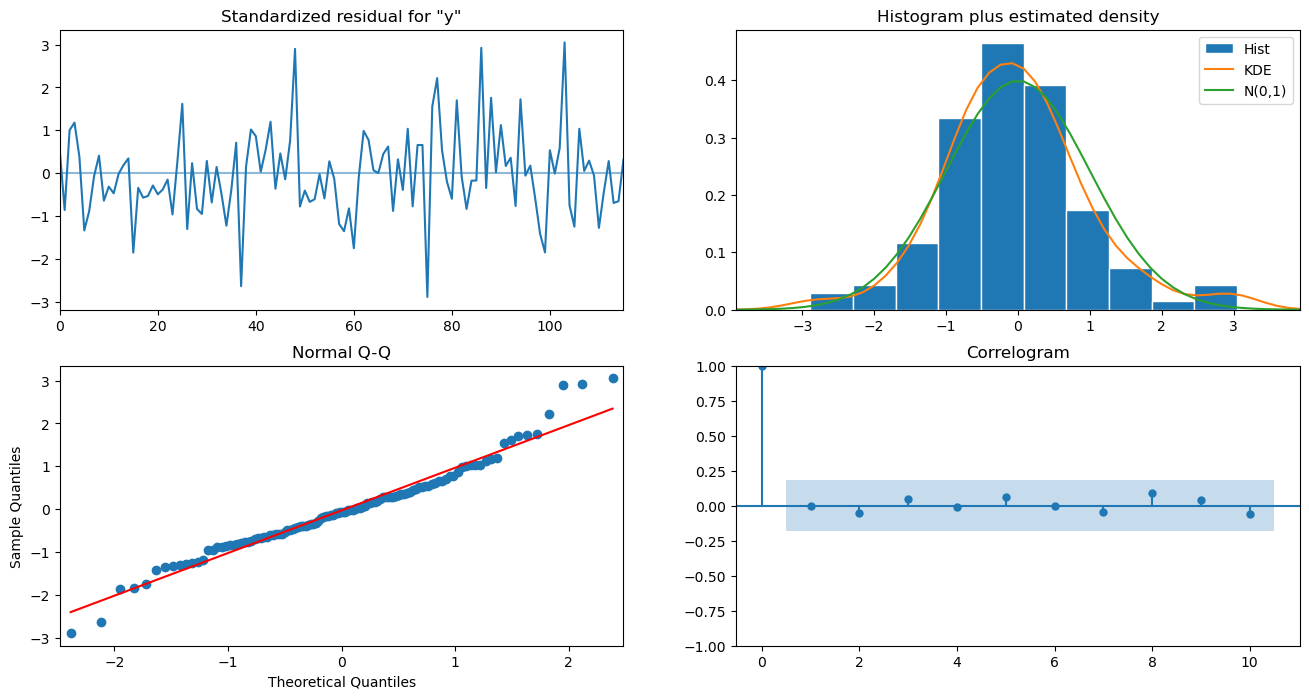

In [134]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

#### Predict on Test Set

In [135]:
pred = results_SARIMA.get_forecast(steps=len(testsoft))
pred.predicted_mean

array([2716.6686449 , 3110.19892084, 3344.80110219, 3103.9726505 ,
       3290.39882845, 2950.4628695 , 3566.38408069, 3558.4051187 ,
       3598.63092791, 3660.23465755, 4342.75690665, 4875.1832619 ,
       2791.59373053, 3182.50588048, 3412.6898542 , 3176.94231553,
       3363.30611122, 3032.9033982 , 3625.62038813, 3619.87113109,
       3660.52299792, 3719.66089207, 4389.69690292, 4909.86083631,
       2870.54679274, 3253.7112047 , 3479.5664521 , 3248.78644956,
       3435.0229062 , 3113.90023495, 3684.10579388, 3680.50115367,
       3721.54772089, 3778.29479169, 4436.09038859, 4944.28317347,
       2948.25121441, 3323.83221014, 3545.44627981, 3319.52307238,
       3505.56981863, 3193.48052767, 3741.84850309, 3740.30594243,
       3781.71693592, 3836.14612764, 4481.94195125, 4978.44780324,
       3024.72770884, 3392.88592857, 3610.34448027, 3389.16989981,
       3574.96707125, 3271.67087521])

In [136]:
pred.summary_frame(alpha=0.05)

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2716.668645,318.173708,2093.059636,3340.277654
1,3110.198921,325.817838,2471.607692,3748.790150
2,3344.801102,328.586947,2700.782521,3988.819683
3,3103.972650,331.332355,2454.573169,3753.372132
4,3290.398828,334.055985,2635.661130,3945.136527
5,2950.462870,336.758449,2290.428438,3610.497301
6,3566.384081,336.858052,2906.154431,4226.613730
7,3558.405119,338.312228,2895.325337,4221.484901
8,3598.630928,340.200667,2931.849874,4265.411982
9,3660.234658,342.071643,2989.786557,4330.682759


In [137]:
rmse_sarima_012 = mean_squared_error(testsoft['SoftDrinkProduction'],pred.predicted_mean,squared=False)
print(rmse_sarima_012)

447.1027758021673


In [138]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_sarima_012]}
                           ,index=['SARIMA (0,1,2)(2,0,2,6)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,779.424337
NaiveModel,1531.144029
Simple Average Model,929.523210
2 point Trailing Moving Average,561.833461
4 point Trailing Moving Average,693.266525
6 point Trailing Moving Average,716.510800
9 point Trailing Moving Average,742.538655
"Alpha=0.098,Simple Exponential Smoothing",823.511984
"Alpha=0.02,Simple Exponential Smoothing",809.190056
Alpha =0.688 Beta=9.9e-05 Double Exponential Smoothing Model,2797.572981


### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - 12

In [139]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [140]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [141]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(trainsoft['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1836.2200937706332
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1633.549179365403
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1789.866280699666
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1764.610723889889
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1591.5155744481174
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1608.648860364038


C:\Users\Deepak\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1608.6165283980654
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1591.8014039553657
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2035.487178390737
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1788.536969484467
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:1577.0183750462545
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1749.982475585007
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1697.799731103428
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:1530.691431558183
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:1563.4637994171333
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:1558.2120753852712
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:1529.2536659265947
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC:2008.753008540966
SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC:1762.3734963548711
SARIMA(0, 1, 2)x(0, 0, 2, 12)7 - AIC:1560.8259136547608
SARIMA(0, 1, 2)x(1, 0, 0, 12)7 - AIC:1744.33308446554
SARIMA(0, 1, 2)x(1, 0, 1, 12)7 - AIC:1684.9857149271606
SARIMA(0, 1, 2)x(1, 0, 2, 12)7 - AIC:1518.2293806269277
SARIMA(0, 1, 2)x(2, 0, 0, 12)7 - AIC:1564.2964670213423


In [142]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",1517.207903
23,"(0, 1, 2)","(1, 0, 2, 12)",1518.229381
53,"(1, 1, 2)","(2, 0, 2, 12)",1518.328977
50,"(1, 1, 2)","(1, 0, 2, 12)",1519.197012
80,"(2, 1, 2)","(2, 0, 2, 12)",1520.313656


In [143]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(trainsoft['SoftDrinkProduction'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -751.604
Date:                            Thu, 26 Oct 2023   AIC                           1517.208
Time:                                    23:35:20   BIC                           1535.719
Sample:                                         0   HQIC                          1524.707
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9981      0.141     -7.092      0.000      -1.274      -0.722
ma.L2         -0.1064      0.121   

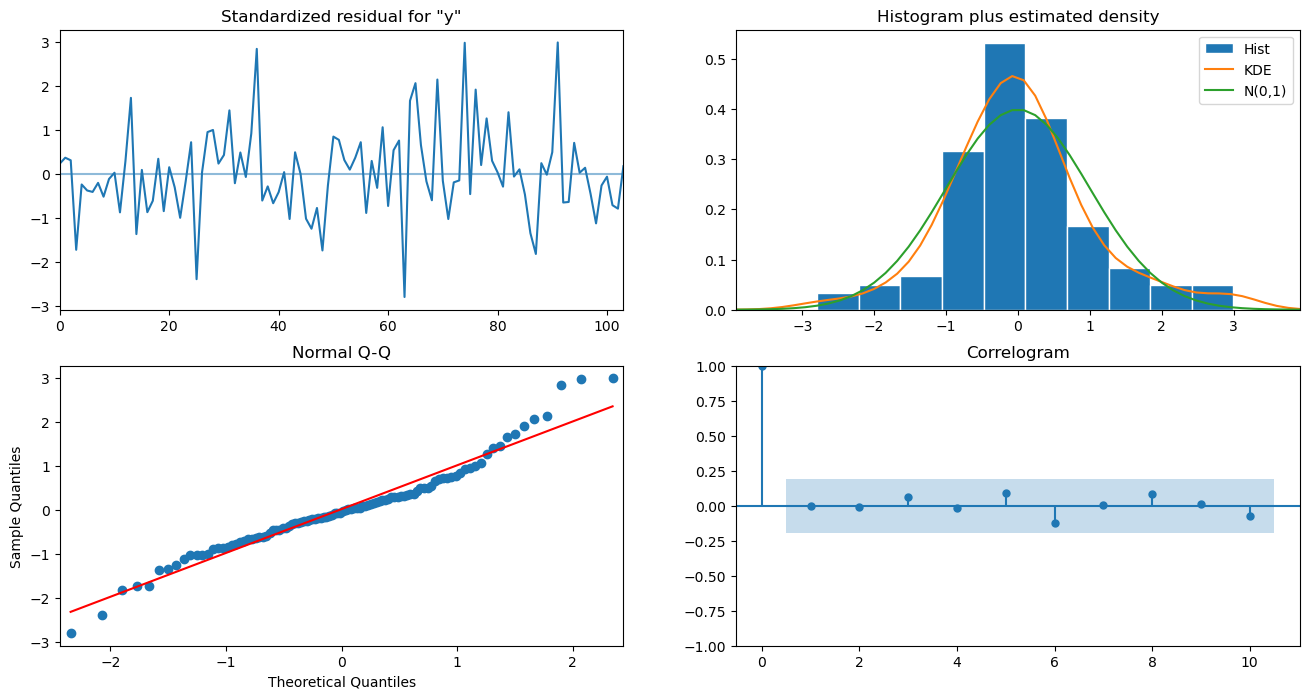

In [144]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

### predict on Test Set - 12

In [145]:
pred = results_SARIMA.get_forecast(steps=len(testsoft))
pred.predicted_mean

array([2657.02497853, 2979.30664259, 3404.28629906, 3086.45876234,
       3284.53285535, 3041.22606607, 3570.92490447, 3531.52182484,
       3663.73912933, 3680.0180604 , 4380.37246713, 4914.34147887,
       2734.06058646, 3055.70939266, 3475.28726945, 3161.43701346,
       3356.99641929, 3116.95748002, 3640.50292696, 3600.59759292,
       3731.78990047, 3749.01815021, 4441.58974775, 4969.64396003,
       2812.93702272, 3130.96279003, 3545.94402036, 3235.55584072,
       3428.97168735, 3191.49598638, 3709.08596011, 3669.99834483,
       3799.50468468, 3816.10555604, 4500.6651749 , 5022.60341423,
       2891.09423391, 3205.45936708, 3615.6149165 , 3308.8271572 ,
       3499.99426077, 3265.30526476, 3776.95959814, 3738.18241247,
       3866.27694726, 3882.85088062, 4559.61076302, 5075.60487183,
       2968.28770853, 3279.06404394, 3684.55583257, 3381.25987246,
       3570.25310824, 3338.22315219])

In [146]:
pred.summary_frame(alpha=0.05)

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2657.024979,328.613865,2012.953639,3301.096318
1,2979.306643,334.136599,2324.410942,3634.202343
2,3404.286299,335.603093,2746.516324,4062.056274
3,3086.458762,337.063862,2425.825733,3747.091792
4,3284.532855,338.518354,2621.049074,3948.016637
5,3041.226066,339.966628,2374.903719,3707.548413
6,3570.924904,341.408759,2901.776033,4240.073776
7,3531.521825,342.844824,2859.558318,4203.485332
8,3663.739129,344.274898,2988.972728,4338.505531
9,3680.018060,345.699058,3002.460358,4357.575763


In [147]:
rmse_sarima_112 = mean_squared_error(testsoft['SoftDrinkProduction'],pred.predicted_mean,squared=False)
print(rmse_sarima_112)

437.5519771222757


In [148]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_sarima_112]}
                           ,index=['SARIMA (0,1,2)(2,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,779.424337
NaiveModel,1531.144029
Simple Average Model,929.523210
2 point Trailing Moving Average,561.833461
4 point Trailing Moving Average,693.266525
6 point Trailing Moving Average,716.510800
9 point Trailing Moving Average,742.538655
"Alpha=0.098,Simple Exponential Smoothing",823.511984
"Alpha=0.02,Simple Exponential Smoothing",809.190056
Alpha =0.688 Beta=9.9e-05 Double Exponential Smoothing Model,2797.572981


### Plot ACF PACF to build ARIMA/SARIMA Model

In [149]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [150]:
df1

,YearMonth,SoftDrinkProduction
0,1980-01,1954
1,1980-02,2302
2,1980-03,3054
3,1980-04,2414
4,1980-05,2226
...,...,...
182,1995-03,4067
183,1995-04,4022
184,1995-05,3937
185,1995-06,4365


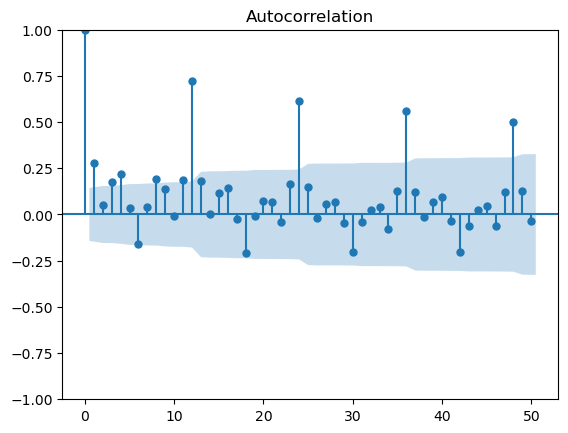

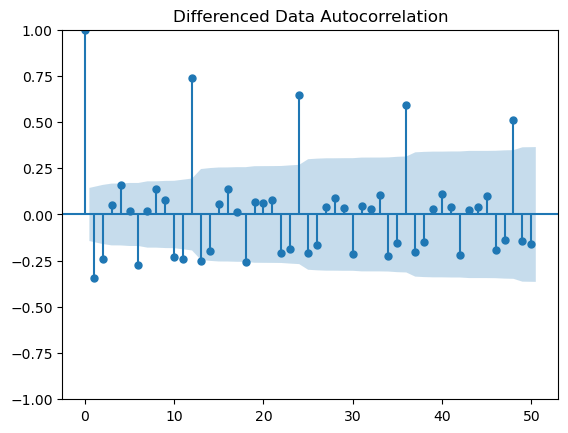

In [157]:
#ACF plots
plot_acf(df1['SoftDrinkProduction'],lags=50)
plot_acf(df1['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

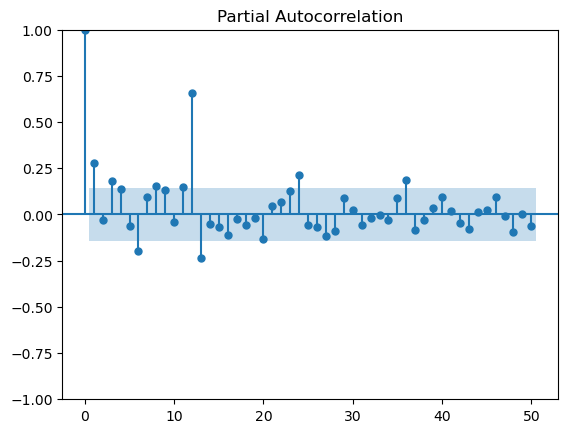

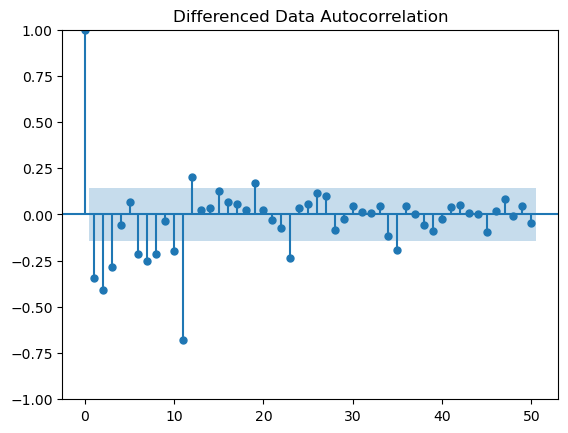

In [159]:
#PACF
plot_pacf(df1['SoftDrinkProduction'],lags=50)
plot_pacf(df1['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [160]:
#12th month seasonality fromn PACF
#P = 3 
#pdq = 3, 1, 2

In [161]:
manual_ARIMA = ARIMA(trainsoft['SoftDrinkProduction'], order=(3,1,2),freq='M')

results_manual_Arima = manual_ARIMA.fit()

print(results_manual_Arima.summary())

                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(3, 1, 2)   Log Likelihood               -1024.340
Date:                 Thu, 26 Oct 2023   AIC                           2060.680
Time:                         23:47:01   BIC                           2077.931
Sample:                     01-31-1980   HQIC                          2067.690
                          - 12-31-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3216      0.460     -0.700      0.484      -1.223       0.579
ar.L2         -0.0001      0.189     -0.001      0.999      -0.371       0.370
ar.L3         -0.0227      0.218     -0.104 

C:\Users\Deepak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [162]:
predicted_manual_ARIMA = results_manual_Arima.forecast(steps=len(testsoft))

In [165]:
rmse_man_arima_010 = mean_squared_error(testsoft,predicted,squared=False)
print(rmse_man_arima_010)

823.562325814588


In [166]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_man_arima_010]}
                           ,index=['Manual ARIMA (3,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,779.424337
NaiveModel,1531.144029
Simple Average Model,929.523210
2 point Trailing Moving Average,561.833461
4 point Trailing Moving Average,693.266525
6 point Trailing Moving Average,716.510800
9 point Trailing Moving Average,742.538655
"Alpha=0.098,Simple Exponential Smoothing",823.511984
"Alpha=0.02,Simple Exponential Smoothing",809.190056
Alpha =0.688 Beta=9.9e-05 Double Exponential Smoothing Model,2797.572981


In [167]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(trainsoft['SoftDrinkProduction'].values,
                                order=(3, 1, 2),
                                seasonal_order=(2,0,2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = mod.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -835.621
Date:                           Thu, 26 Oct 2023   AIC                           1691.241
Time:                                   23:48:01   BIC                           1718.777
Sample:                                        0   HQIC                          1702.419
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3640      1.293      0.281      0.778      -2.171       2.899
ar.L2         -0.0999      0.159     -0.630

In [168]:
predicted_manual_SARIMA = results_manual_SARIMA.forecast(steps=len(testsoft))

In [169]:
rmse_man_sarima_212 = mean_squared_error(testsoft['SoftDrinkProduction'],predicted_manual_SARIMA,squared=False)
print(rmse_man_sarima_212)

447.04997443806394


In [170]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_man_sarima_212]}
                           ,index=['Manual SARIMA (3,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,779.424337
NaiveModel,1531.144029
Simple Average Model,929.523210
2 point Trailing Moving Average,561.833461
4 point Trailing Moving Average,693.266525
6 point Trailing Moving Average,716.510800
9 point Trailing Moving Average,742.538655
"Alpha=0.098,Simple Exponential Smoothing",823.511984
"Alpha=0.02,Simple Exponential Smoothing",809.190056
Alpha =0.688 Beta=9.9e-05 Double Exponential Smoothing Model,2797.572981


In [171]:
resultsDf 

,Test RMSE
RegressionOnTime,779.424337
NaiveModel,1531.144029
Simple Average Model,929.523210
2 point Trailing Moving Average,561.833461
4 point Trailing Moving Average,693.266525
6 point Trailing Moving Average,716.510800
9 point Trailing Moving Average,742.538655
"Alpha=0.098,Simple Exponential Smoothing",823.511984
"Alpha=0.02,Simple Exponential Smoothing",809.190056
Alpha =0.688 Beta=9.9e-05 Double Exponential Smoothing Model,2797.572981


In [172]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.7, Beta=0.01, Gamma=0.2,Triple Exponential Smoothing",407.866388
"SARIMA (0,1,2)(2,0,2,12)",437.551977
"Alpha=0.111, Beta=0.061, Gamma=0.395,Triple Exponential Smoothing",446.825827
"Manual SARIMA (3,1,2)",447.049974
"SARIMA (0,1,2)(2,0,2,6)",447.102776
2 point Trailing Moving Average,561.833461
4 point Trailing Moving Average,693.266525
6 point Trailing Moving Average,716.510800
"Alpha=0.02,Beta=0.17,Double Exponential Smoothing",738.705950
"Alpha=0.02,Beta=0.17,Double Exponential Smoothing",738.705950


In [173]:
resultsDf.to_csv('predict.csv')

In this particular we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. 

The two models to be built on the whole data are the following:

Alpha=0.7, Beta=0.01, Gamma=0.2 ,Triple Exponential Smoothing

In [175]:
df = pd.read_csv('SoftDrink.csv', parse_dates=True,squeeze=True,index_col=0)
df.head()

YearMonth
1980-01-01    1954
1980-02-01    2302
1980-03-01    3054
1980-04-01    2414
1980-05-01    2226
Name: SoftDrinkProduction, dtype: int64

In [176]:
fullmodel2 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.7,
                                                                 smoothing_trend=0.01,
                                                                 smoothing_seasonal=0.2)

C:\Users\Deepak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [178]:
RMSE_fullmodel2 = metrics.mean_squared_error(df,fullmodel2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2)

RMSE: 391.31362463386836


In [179]:
prediction_1 = fullmodel2.forecast(steps=12)

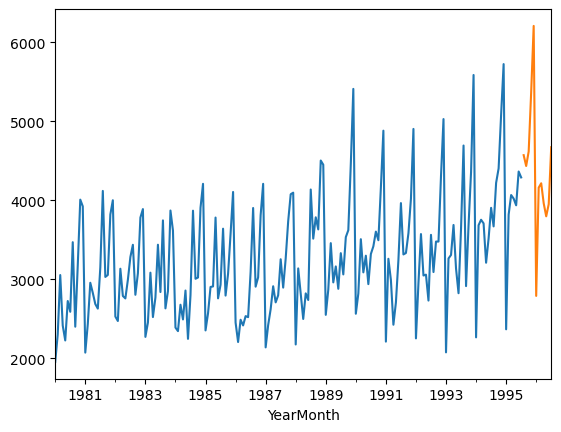

In [180]:
df.plot()
prediction_1.plot();

In [181]:
np.std(fullmodel2.resid,ddof=1)

392.3611645497785

In [182]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel2.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel2.resid,ddof=1)})
pred_1_df.head(12)

,lower_CI,prediction,upper_ci
1995-08-01,3802.943764,4571.971647,5340.999529
1995-09-01,3665.615292,4434.643174,5203.671057
1995-10-01,3849.596818,4618.624700,5387.652583
1995-11-01,4604.530174,5373.558056,6142.585939
1995-12-01,5439.299121,6208.327004,6977.354886
1996-01-01,2020.972056,2789.999939,3559.027821
1996-02-01,3391.684770,4160.712653,4929.740535
1996-03-01,3446.911457,4215.939339,4984.967222
1996-04-01,3192.881840,3961.909723,4730.937605
1996-05-01,3028.430155,3797.458037,4566.485920


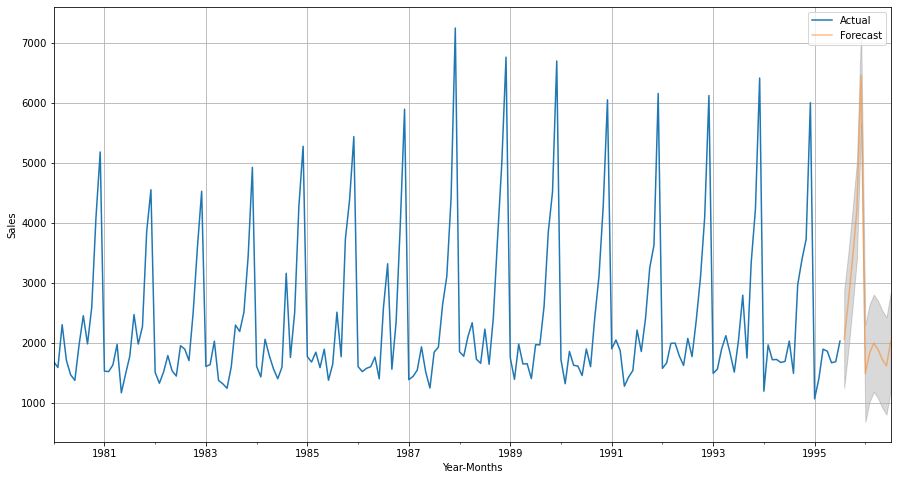

In [275]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()